In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the dataset from https://www.kaggle.com/mansoordaku/ckdisease
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<AxesSubplot:>

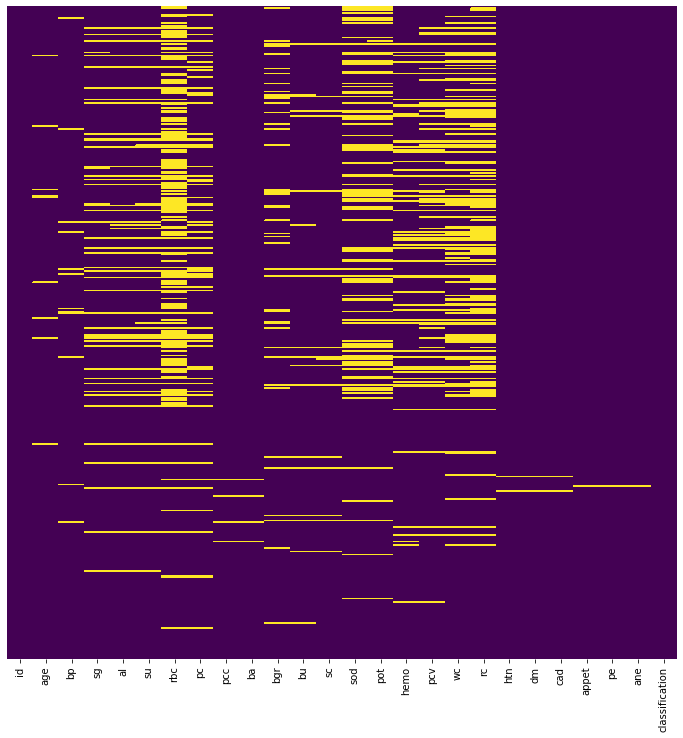

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
# Changing data types of all numerical features
df['pcv']=pd.to_numeric(df['pcv'], errors='coerce')
df['wc']=pd.to_numeric(df['wc'], errors='coerce')
df['rc']=pd.to_numeric(df['rc'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [9]:
df.drop('id', axis = 1, inplace = True)

<AxesSubplot:>

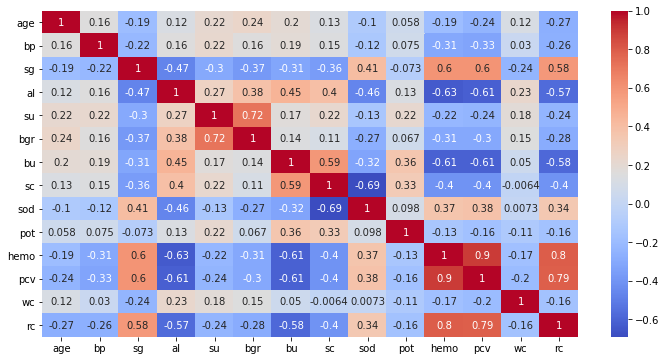

In [10]:
# Visualize the correlation between all the variables of the dataset. (1 point)
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [11]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
numeric_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [13]:
categorical_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [14]:
for col in categorical_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [15]:
df['dm'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
df['cad'].replace(to_replace='\tno' , value='no',inplace=True)
df['classification'].replace(to_replace="ckd\t" ,value="ckd",inplace=True) 

In [16]:
for col in categorical_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'notckd'] values



In [17]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [18]:
def random_value_imputation(feature):
    #calculate random sample and store into random_sample_values
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
#In random_sample_value all filled nan values are present now we want to merge this all filled values in our dataset
#for this we want to match all nan values index with random_sample_values index
#Pandas need to have same index in order to merge dataset
    random_sample.index = df[df[feature].isnull()].index
#find index of NaN values in feature
#now put a condition where ever it is null with loc function then replace with random_sample_values
    df.loc[df[feature].isnull(),feature] =random_sample

In [19]:
#filling num columns null values using random sampling method
for col in numeric_cols:
    random_value_imputation(col)

In [20]:
df.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [21]:
# for categorical columns we will use mode
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] =df[feature].fillna(mode)

In [22]:
for col in categorical_cols:
    impute_mode(col)

In [23]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

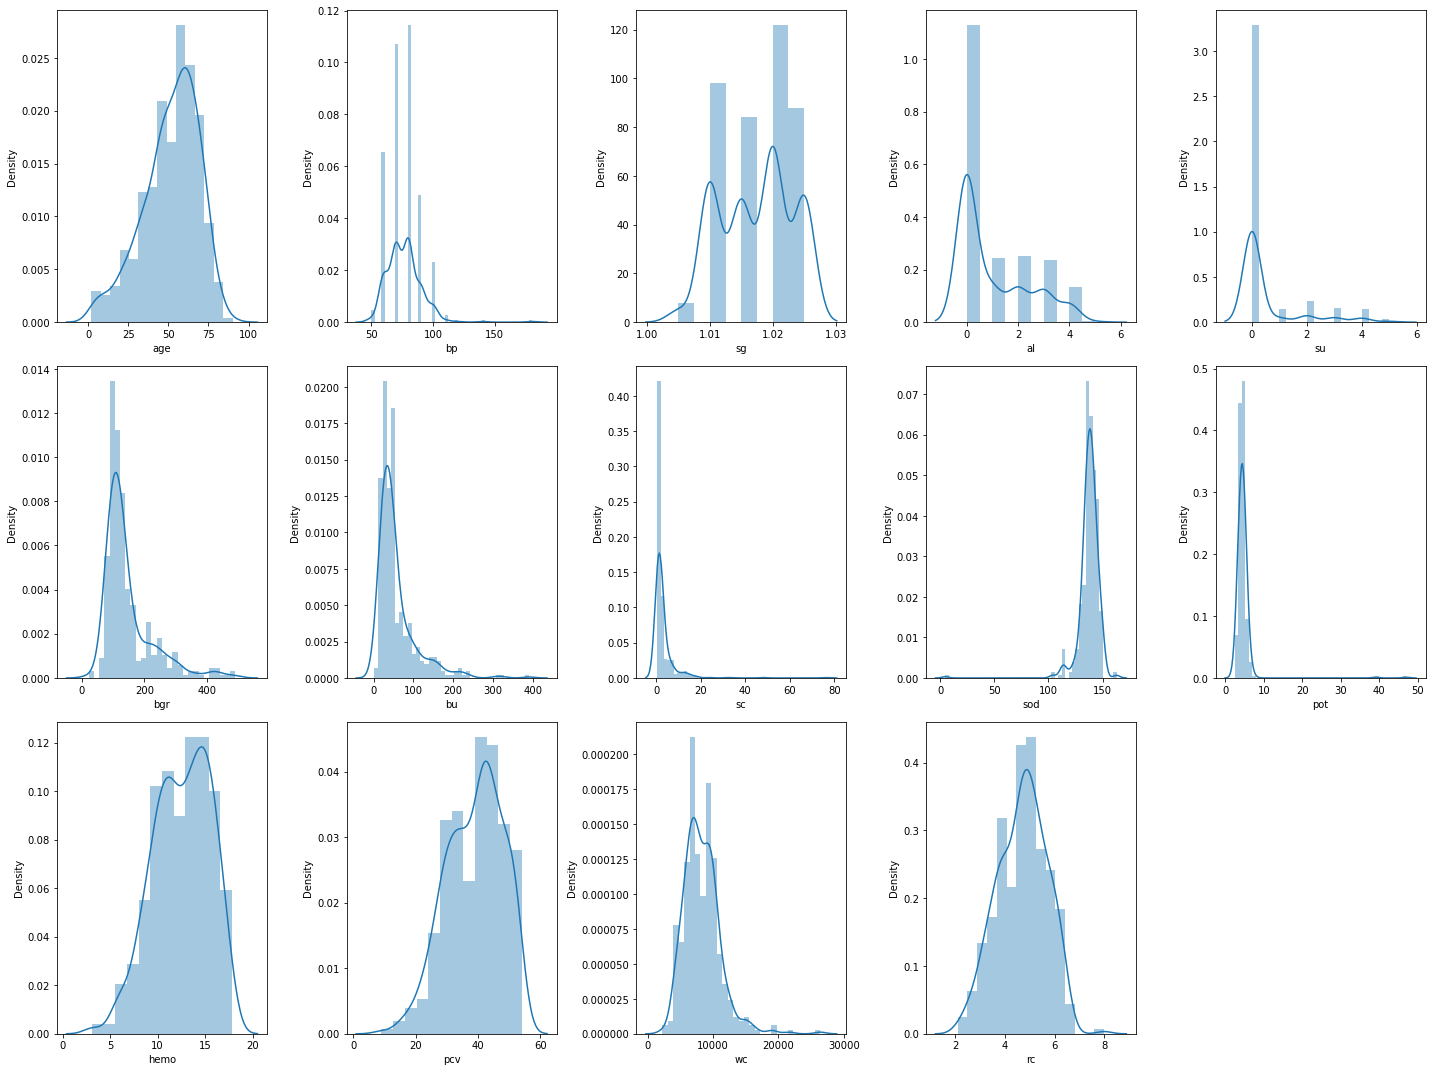

In [24]:
# Visualize the dataset using any two appropriate graphs. (1 point)
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
###label encoding for categorical data 
from sklearn.preprocessing  import LabelEncoder

encode = LabelEncoder()

for col in categorical_cols:
    df[col]=encode.fit_transform(df[col])

In [26]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,125.0,...,38.0,6000.0,6.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [27]:
# Extract X as all columns except the last column and Y as the last column. (1 point)
X = df.drop(columns ='classification' , axis=1)
y = df['classification']

In [28]:
 # Do feature scaling (1 point)
from sklearn.preprocessing import StandardScaler
scobj = StandardScaler()
scobj.fit(X)
scfeat = scobj.transform(X)
dffeat = pd.DataFrame(scfeat,columns=df.columns[:-1])
dffeat.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.211983,0.261417,0.473903,-0.005579,-0.415581,0.36489,0.484322,-0.342518,-0.241249,-0.328754,...,0.967370,0.565858,-0.171216,0.505592,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084
1,-2.609585,-1.963405,0.473903,2.225880,-0.415581,0.36489,0.484322,-0.342518,-0.241249,-0.277175,...,-0.413625,-0.102807,-0.817991,1.314540,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
2,0.606710,0.261417,-1.281293,0.738241,2.354961,0.36489,0.484322,-0.342518,-0.241249,3.565491,...,-0.986232,-0.882917,-0.279012,0.505592,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476
3,-0.211983,-0.480191,-2.158892,2.225880,-0.415581,0.36489,-2.064742,2.919556,-0.241249,-0.380334,...,-0.447308,-0.771473,-0.566467,-0.808948,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476
4,-0.036549,0.261417,-1.281293,0.738241,-0.415581,0.36489,0.484322,-0.342518,-0.241249,-0.522177,...,-0.312576,-0.437140,-0.350876,-0.101118,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084


In [29]:
dffeat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [30]:
##model selection 
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

feture_el_model  = SelectFromModel(Lasso(alpha=0.005 ,random_state =42))

feture_el_model.fit(X,y)
feture_el_model.get_support()

array([ True,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True])

In [31]:
cols= X.columns
selected_feature = cols[feture_el_model.get_support()]

In [32]:
print('total_features {}' .format(X.shape[1]))
print('total_features {}' .format(len(selected_feature)))

total_features 24
total_features 19


In [33]:
X= X[selected_feature]

In [34]:
X1 = pd.concat([X,y],axis=1)
X1

,age,bp,al,su,rbc,bgr,bu,sc,sod,pot,hemo,pcv,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.0,0.0,1,121.0,36.0,1.2,131.0,3.8,15.4,44.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,4.0,0.0,1,125.0,18.0,0.8,139.0,5.0,11.3,38.0,6.0,0,0,0,0,0,0,0
2,62.0,80.0,2.0,3.0,1,423.0,53.0,1.8,139.0,3.2,9.6,31.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,4.0,0.0,1,117.0,56.0,3.8,111.0,2.5,11.2,32.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,2.0,0.0,1,106.0,26.0,1.4,114.0,4.7,11.6,35.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,0.0,1,140.0,49.0,0.5,150.0,4.9,15.7,47.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,0.0,0.0,1,75.0,31.0,1.2,141.0,3.5,16.5,54.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,0.0,0.0,1,100.0,26.0,0.6,137.0,4.4,15.8,49.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,0.0,0.0,1,114.0,50.0,1.0,135.0,4.9,14.2,51.0,5.9,0,0,0,0,0,0,1


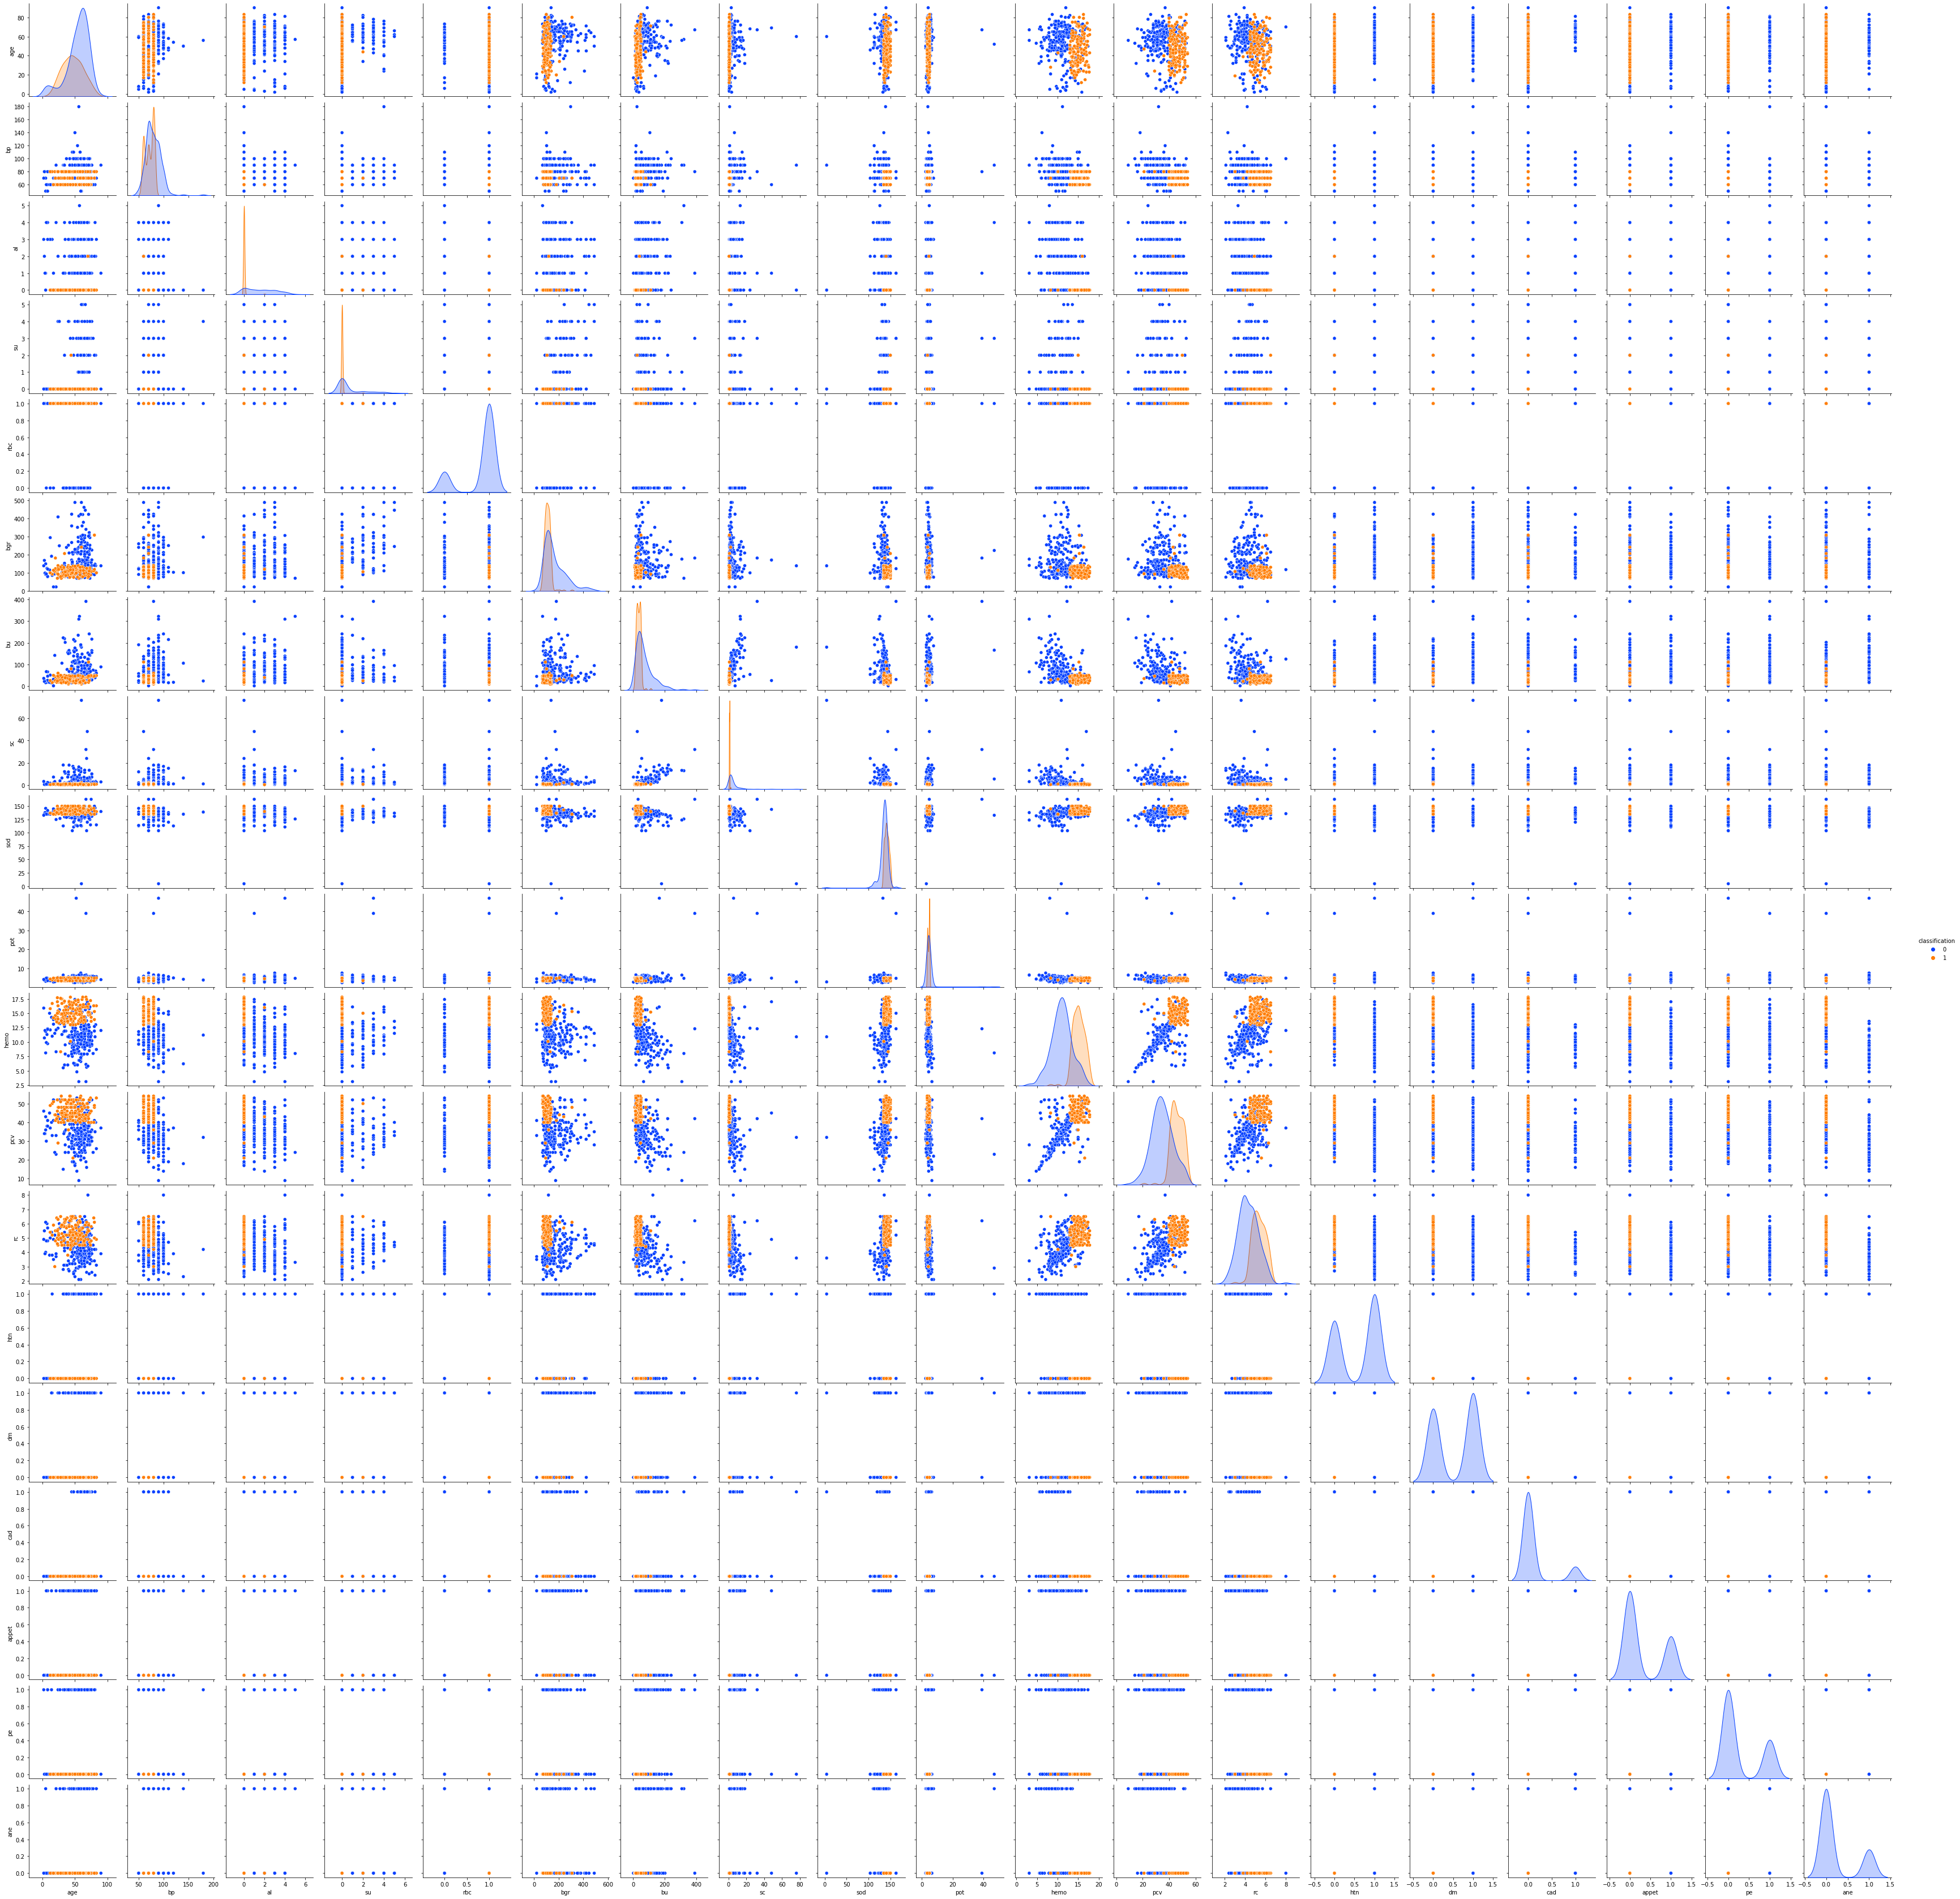

In [35]:
sns.pairplot(X1, hue='classification',palette='bright')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# 6. Split the data into a training set and testing set. (1 point).
X_train, X_test, y_train, y_test = train_test_split(dffeat, y, test_size=0.30, random_state=101)

In [38]:
from sklearn.svm import SVC

In [39]:
model = SVC()

In [40]:
#8. Train an SVM model for the dataset. (1 point)
model.fit(X_train,y_train)

SVC()

In [41]:
predictions = model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
classes = ['ckd' ,'notckd']
def plot_confusionmatrix(pred,y_test,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_test,pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Test score 0.9916666666666667
Test Confusion matrix


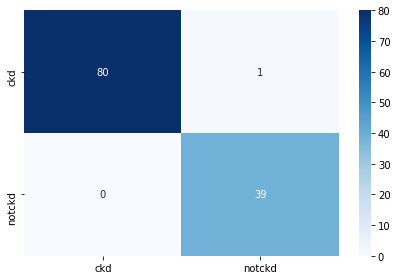

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.97      1.00      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [44]:
# Get the classification report and confusion matrix. (1 point)
print(f'Test score {accuracy_score(predictions,y_test)}')
plot_confusionmatrix(predictions,y_test,dom='Test')
print(classification_report(y_test,predictions))

In [45]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
#7. Perform 5-fold cross-validation (1 point).
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [48]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [50]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [51]:
grid_predictions = grid.predict(X_test)

Test score 0.9666666666666667
Test Confusion matrix


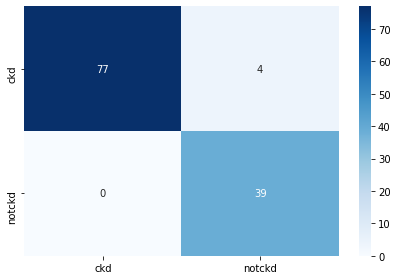

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        81
           1       0.91      1.00      0.95        39

    accuracy                           0.97       120
   macro avg       0.95      0.98      0.96       120
weighted avg       0.97      0.97      0.97       120



In [52]:
print(f'Test score {accuracy_score(grid_predictions,y_test)}')
plot_confusionmatrix(grid_predictions,y_test,dom='Test')
print(classification_report(y_test,grid_predictions))